# Validating PlantNet on our data

1. Change the weights and the images storage with your paths
2. Do the labelling of the data

In [1]:
from utils import load_model
from torchvision.models import resnet18, resnet152

# Change this line with your downloaded model
filename = '/Users/francescocenciarelli/Downloads/resnet152_weights_best_acc.tar' # pre-trained model path
use_gpu = True  # load weights on the gpu
model = resnet152(num_classes=1081) # 1081 classes in Pl@ntNet-300K, change the net here

load_model(model, filename=filename, use_gpu=False)


/Users/francescocenciarelli/miniconda3/envs/ML2/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


21

In [105]:
from PIL import Image
import numpy as np
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import os


results = []

for picture_type in ['clover', 'grass']:
    file_names = os.listdir(f'./testing_images/sets/{picture_type}')

    current_result = []

    n = 0

    for file in file_names:

        if n >99:
            break

        n += 1

        # Define the image path and model
        image_path = f'./testing_images/sets/{picture_type}/{file}'  # Replace with your image path
        model.eval()  # Ensure model is in evaluation mode
        # Load and preprocess the image
        image = Image.open(image_path).convert('RGB')

        # Define the transformation: resize, to tensor, and normalize
        transform = transforms.Compose([
            transforms.Resize((224, 224)),  # Resize image to 8x8
            transforms.ToTensor(),      # Convert PIL image to PyTorch tensor
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize with ImageNet stats
        ])

        # Apply the transformation to the image
        image_tensor = transform(image).unsqueeze(0)  # Add batch dimension

        print(image_tensor.shape)  # Should print torch.Size([1, 3, 8, 8])

        # Ensure no gradients are calculated
        with torch.no_grad():
            # Pass the image through the model and get the output
            output = model(image_tensor)

        # Convert the output to a numpy array for processing
        output_np = output.squeeze().cpu().numpy()

        # Apply threshold to the output for visualization
        output_np = np.where(output_np < 0.9, 0, output_np)

        output_only_np = np.array([i for i in output_np if i > 0.9]).reshape(-1, 1)

        trifoliums = []
        for i in genus_ids[13]:
            # print(output_np[i], end=' ')
            trifoliums.append(output_np[i])

        # for i in range(0, 1000):
        #     trifoliums.append(output_np[i])

        print(max(trifoliums))
        print(sum(trifoliums))

        # current_result.append(sum(trifoliums))
        current_result.append(trifoliums)
        print()
        # print("The size of the output is: ", output_np.shape)

        # print("The size of hte output is: ", output_only_np.shape)


        # # Plot the output as a heatmap
        # plt.figure(figsize=(10, 8))
        # plt.plot(output_np)
            
        # plt.title('Model Output, Class vs Score for each class')
        # plt.xlabel('Class')
        # plt.ylabel('Output Value')
        # plt.show()

    results.append(current_result)




torch.Size([1, 3, 224, 224])
9.395575
54.094164967536926

torch.Size([1, 3, 224, 224])
8.599042
51.55437582731247

torch.Size([1, 3, 224, 224])
10.572673
65.58398795127869

torch.Size([1, 3, 224, 224])
10.882994
80.35165911912918

torch.Size([1, 3, 224, 224])
10.931105
73.00727570056915

torch.Size([1, 3, 224, 224])
9.933057
79.64103412628174

torch.Size([1, 3, 224, 224])
10.32482
63.203357458114624

torch.Size([1, 3, 224, 224])
8.419819
44.79449212551117

torch.Size([1, 3, 224, 224])
10.925016
91.41354805231094

torch.Size([1, 3, 224, 224])
9.650766
33.06153655052185

torch.Size([1, 3, 224, 224])
14.55673
115.72231376171112

torch.Size([1, 3, 224, 224])
6.6644607
59.36637890338898

torch.Size([1, 3, 224, 224])
8.311028
42.639441788196564

torch.Size([1, 3, 224, 224])
8.722359
66.21996140480042

torch.Size([1, 3, 224, 224])
6.504617
38.31400543451309

torch.Size([1, 3, 224, 224])
10.431061
60.60648798942566

torch.Size([1, 3, 224, 224])
10.238184
63.819095849990845

torch.Size([1, 3, 2

In [ ]:
import json

# File paths
species_codes_file = 'class_idx_to_species_id.json'
plant_names_file = 'species_id.json'

# Read the JSON files
with open(species_codes_file, 'r') as f:
    species_codes = json.load(f)

with open(plant_names_file, 'r') as f:
    plant_names = json.load(f)

# Connect the label to the plant name
label_to_plant_name = {label: plant_names[species_code] for label, species_code in species_codes.items()}


for i in output_np:
    if i > 0:
        indices = np.where(output_np == i)
        for index in indices[0]:
            if index < 10:

                print(f"Index: {index}")
                print(f"Output Value: {i}")
                print(f"Plant Name: {label_to_plant_name[str(index)]}")
            else:
                pass

index = output_np.argmax()
print(f"The most probable Plant Name is: {label_to_plant_name[str(index)]}")

# Get the indices of the top five maximum values
top_five_indices = output_np.argsort()[-5:][::-1]

print()
# Print the indices and corresponding values
for idx in top_five_indices:
    print(f"Index: {idx}, Value: {output_np[idx]}")
    print(f"Plant Name: {label_to_plant_name[str(idx)]}")

genus = []
genus_ids = []

for i in range(len(label_to_plant_name)):
    label_to_plant_name[str(i)].split(" ")
    # print(label_to_plant_name[str(i)].split(" "))
    genus_found = label_to_plant_name[str(i)].split(" ")[0]
    if genus_found not in genus:
        genus.append(label_to_plant_name[str(i)].split(" ")[0])
        genus_ids.append([i])
    else:
        genus_ids[genus.index(genus_found)].append(i)
    
print(len(genus_ids))
print(len(genus))

(2, 100, 39)
Length of results for Class 1: 100
Length of results for Class 2: 100
Mean of results for each class: [[[ 4.975908    1.0834497   1.2237633   0.45981884  2.6861444
    0.70267653  0.25487912  1.9661936   4.155869    0.7611728
    0.7919195   0.9340455   1.2037983   2.4277458   0.5478246
    2.5647535   6.265362    0.3603999   0.8526308   0.98254514
    0.17083256  0.6537064   0.67175555  0.3909228   5.2887907
    1.0702846   0.37293068  2.2058299   1.808183    2.9867022
    2.3917603  10.31869     0.94288766  2.4028864   2.087638
    1.7430922   0.25240526  2.4054148   1.5453929 ]
  [ 2.9163625   1.4932808   1.2307651   0.01780644  1.5102252
    0.07422168  0.          0.10596099  1.5767213   0.0289455
    0.08076757  0.5756153   0.8488807   0.46701387  0.10296911
    1.5172943   4.608015    0.2590705   0.02877847  0.20787445
    0.          0.14870888  0.03742834  0.          2.8443234
    0.05163096  0.15457857  1.1774517   0.26030797  1.236459
    0.97330266  7.465092  

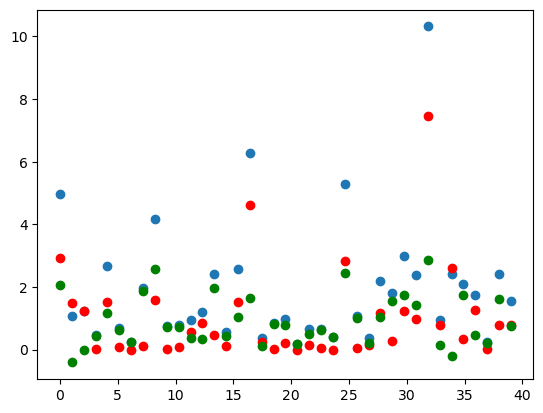

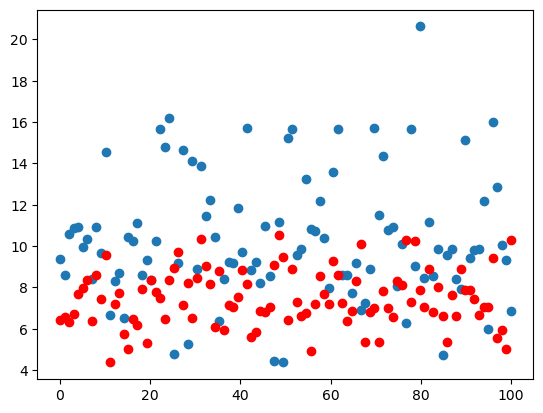

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming you have already defined 'results' which are regular Python lists
# Let's convert these lists to NumPy arrays

results = np.array(results)
# results = [np.array(result) for result in results]

print(results.shape)

# Printing lengths of each class's results
print("Length of results for Class 1:", results[0].shape[0])  # Assuming results are (2, 100)
print("Length of results for Class 2:", results[1].shape[0])

# Calculate and print mean of the results for each class
means = np.array([np.mean(results, axis=1)])
print("Mean of results for each class:", means)

print(means.shape)
# features = np.array([np.mean(means, axis=1)])
print(means[0, 0, :].shape)
print(np.linspace(0, 39, 39).shape)

plt.figure()
plt.scatter(np.linspace(0, 39, 39),means[0, 0, :])
plt.scatter(np.linspace(0, 39, 39),means[0, 1, :], color='red')
plt.scatter(np.linspace(0, 39, 39),(means[0, 0, :]-means[0, 1, :]), color='green')
delta = means[0, 0, :]-means[0, 1, :]
print(max(delta))
print(delta.argmax())


print(results[0, :, 0].shape)

plt.figure()
plt.scatter(np.linspace(0, 100, len(results[0])),results[0, :, 31] )
plt.scatter(np.linspace(0, 100, len(results[1])), results[1, :, 31], color='red')




In [100]:
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Simulating your dataset
# Assuming you have a 3D numpy array 'X' of shape (2, 100, 39)
# Create random data for the example:

X_class1 = results[0, :, :]
X_class2 = results[1, :, :]

# Combine into a single data array
X = np.vstack([X_class1, X_class2])

# Create labels (0 for class 1, 1 for class 2)
y = np.array([0]*100 + [1]*100)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Create a perceptron object
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=0)

# Train the perceptron
perceptron.fit(X_train, y_train)

# Predict using the trained perceptron
y_pred = perceptron.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the perceptron model: {accuracy:.2f}")



Accuracy of the perceptron model: 0.84


In [104]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'results' is already loaded and shaped (2, 100, 39)
X_class1 = results[0, :, :]
X_class2 = results[1, :, :]

# Combine into a single data array
X = np.vstack([X_class1, X_class2])

# Create labels (0 for Class 1, 1 for Class 2)
y = np.array([0] * 100 + [1] * 100)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier object
random_forest = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the Random Forest
random_forest.fit(X_train, y_train)

# Predict using the trained Random Forest
y_pred = random_forest.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Random Forest model: {accuracy:.2f}")

# Additional evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy of the Random Forest model: 0.75
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.62      0.72        21
           1       0.68      0.89      0.77        19

    accuracy                           0.75        40
   macro avg       0.77      0.76      0.75        40
weighted avg       0.78      0.75      0.75        40

Confusion Matrix:
 [[13  8]
 [ 2 17]]


/Users/francescocenciarelli/miniconda3/envs/ML2/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/francescocenciarelli/miniconda3/envs/ML2/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/francescocenciarelli/miniconda3/envs/ML2/lib/python3.10/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/francescocenciarelli/miniconda3/envs/ML2/lib/python3

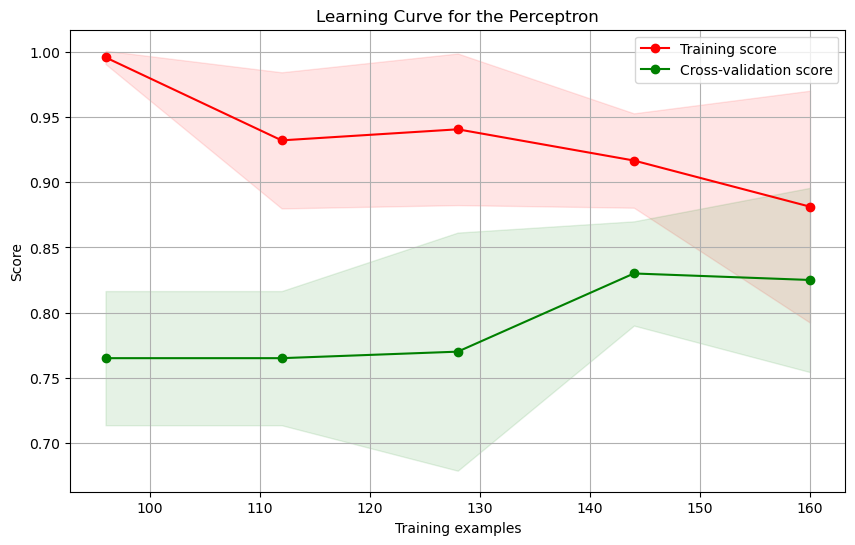

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import accuracy_score

# Simulating your dataset
# Assuming 'results' is a 3D numpy array of shape (2, 100, 39) and it's pre-loaded with data
X_class1 = results[0, :, :]
X_class2 = results[1, :, :]

# Combine into a single data array
X = np.vstack([X_class1, X_class2])

# Create labels (0 for class 1, 1 for class 2)
y = np.array([0]*100 + [1]*100)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create a perceptron object
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=0)

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    perceptron, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy')

# Calculate the average and standard deviation of the training and test score for each number of training samples
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')

plt.title('Learning Curve for the Perceptron')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()


torch.Size([1, 3, 224, 224])


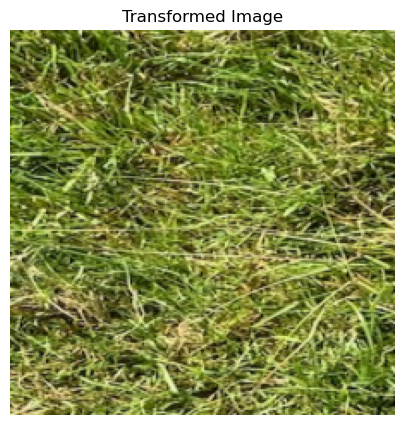

In [6]:
print(image_tensor.shape)  # Should print torch.Size([1, 3, 8, 8])

# Reverse the normalization to visualize the image
unnormalize = transforms.Normalize(
    mean=[-0.485 / 0.229, -0.456 / 0.224, -0.406 / 0.225],
    std=[1 / 0.229, 1 / 0.224, 1 / 0.225]
)

# Apply the unnormalization
image_unnormalized = unnormalize(image_tensor[0])

# Convert tensor to numpy array and transpose to (H, W, C)
image_np = image_unnormalized.permute(1, 2, 0).numpy()

# Clip values to the range [0, 1]
image_np = np.clip(image_np, 0, 1)

# Plot the image
plt.figure(figsize=(5, 5))
plt.imshow(image_np)
plt.title('Transformed Image')
plt.axis('off')
plt.show()

In [7]:
# Load the JSon files

import json

# File paths
species_codes_file = 'class_idx_to_species_id.json'
plant_names_file = 'species_id.json'

# Read the JSON files
with open(species_codes_file, 'r') as f:
    species_codes = json.load(f)

with open(plant_names_file, 'r') as f:
    plant_names = json.load(f)

# Connect the label to the plant name
label_to_plant_name = {label: plant_names[species_code] for label, species_code in species_codes.items()}


for i in output_np:
    if i > 0:
        indices = np.where(output_np == i)
        for index in indices[0]:
            if index < 10:

                print(f"Index: {index}")
                print(f"Output Value: {i}")
                print(f"Plant Name: {label_to_plant_name[str(index)]}")
            else:
                pass


Index: 3
Output Value: 2.8140361309051514
Plant Name: Cirsium arvense (L.) Scop.
Index: 9
Output Value: 0.9531914591789246
Plant Name: Mercurialis annua L.


In [8]:
index = output_np.argmax()
print(f"The most probable Plant Name is: {label_to_plant_name[str(index)]}")

# Get the indices of the top five maximum values
top_five_indices = output_np.argsort()[-5:][::-1]

print()
# Print the indices and corresponding values
for idx in top_five_indices:
    print(f"Index: {idx}, Value: {output_np[idx]}")
    print(f"Plant Name: {label_to_plant_name[str(idx)]}")

genus = []
genus_ids = []

for i in range(len(label_to_plant_name)):
    label_to_plant_name[str(i)].split(" ")
    # print(label_to_plant_name[str(i)].split(" "))
    genus_found = label_to_plant_name[str(i)].split(" ")[0]
    if genus_found not in genus:
        genus.append(label_to_plant_name[str(i)].split(" ")[0])
        genus_ids.append([i])
    else:
        genus_ids[genus.index(genus_found)].append(i)
    
print(len(genus_ids))
print(len(genus))



The most probable Plant Name is: Leersia oryzoides (L.) Sw.

Index: 156, Value: 9.565980911254883
Plant Name: Leersia oryzoides (L.) Sw.
Index: 444, Value: 9.499267578125
Plant Name: Moehringia muscosa L.
Index: 196, Value: 9.260266304016113
Plant Name: Cenchrus setaceus (Forssk.) Morrone
Index: 212, Value: 8.977224349975586
Plant Name: Phalaris arundinacea L.
Index: 209, Value: 8.930569648742676
Plant Name: Cenchrus ciliaris L.


In [9]:
genus = []
genus_ids = []

for i in range(len(label_to_plant_name)):
    label_to_plant_name[str(i)].split(" ")
    # print(label_to_plant_name[str(i)].split(" "))
    genus_found = label_to_plant_name[str(i)].split(" ")[0]
    if genus_found not in genus:
        genus.append(label_to_plant_name[str(i)].split(" ")[0])
        genus_ids.append([i])
    else:
        genus_ids[genus.index(genus_found)].append(i)
    
print(len(genus_ids))
print(len(genus))



303
303


In [10]:
from collections import Counter

# Get the indices of the top five maximum values
top_fifty_indices = output_np.argsort()[-20:][::-1]

print()
# Print the indices and corresponding values
# for idx in top_fifty_indices:
#     print(f"Index: {idx}, Value: {output_np[idx]}")
#     print(f"Plant Name: {label_to_plant_name[str(idx)]}")

print("The top 50 genus are: ")
print(top_fifty_indices)

top_fifty_genus = []
top_fifty_genus_score = []

for idx in top_fifty_indices:
    for i in range(len(genus_ids)):
        if idx in genus_ids[i]:
            top_fifty_genus.append(genus[i])
            top_fifty_genus_score.append(output_np[idx])

            
print(top_fifty_genus)
print(top_fifty_genus_score)


# Zip the species and scores together
zipped_pairs = list(zip(top_fifty_genus, top_fifty_genus_score))

# Sort the zipped pairs by species
sorted_pairs = sorted(zipped_pairs, key=lambda x: x[0])

# Unzip the sorted pairs back into two arrays
sorted_species, sorted_scores = zip(*sorted_pairs)

# Convert back to lists if needed
sorted_species = list(sorted_species)
sorted_scores = list(sorted_scores)

print("Sorted species:", sorted_species)
print("Sorted scores:", sorted_scores)

top_fifty_dict_genus = Counter(top_fifty_genus)
word_counts_dict = dict(top_fifty_dict_genus)

print(word_counts_dict)



The top 50 genus are: 
[156 444 196 212 209 226  45 237 486 308 195 153 173 154 160 581 502 345
 516 174]
['Leersia', 'Moehringia', 'Cenchrus', 'Phalaris', 'Cenchrus', 'Trifolium', 'Limbarda', 'Myosurus', 'Anemone', 'Casuarina', 'Cenchrus', 'Anthericum', 'Lavandula', 'Butomus', 'Elodea', 'Tetraclinis', 'Sagittaria', 'Patzkea', 'Thesium', 'Casuarina']
[9.565981, 9.499268, 9.260266, 8.977224, 8.93057, 8.91827, 8.641332, 8.293565, 8.2641735, 8.060938, 7.753468, 7.4853616, 7.441221, 7.40239, 7.1297665, 7.123358, 7.0532584, 6.878, 6.7304506, 6.7187276]
Sorted species: ['Anemone', 'Anthericum', 'Butomus', 'Casuarina', 'Casuarina', 'Cenchrus', 'Cenchrus', 'Cenchrus', 'Elodea', 'Lavandula', 'Leersia', 'Limbarda', 'Moehringia', 'Myosurus', 'Patzkea', 'Phalaris', 'Sagittaria', 'Tetraclinis', 'Thesium', 'Trifolium']
Sorted scores: [8.2641735, 7.4853616, 7.40239, 8.060938, 6.7187276, 9.260266, 8.93057, 7.753468, 7.1297665, 7.441221, 9.565981, 8.641332, 9.499268, 8.293565, 6.878, 8.977224, 7.05325

In [22]:
print(genus_ids[13])
print(genus[13])
print(label_to_plant_name[str(97)])

[20, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 175, 222, 223, 224, 225, 226, 520, 521, 522, 523, 524, 546, 549]
Trifolium
Trifolium angustifolium L.


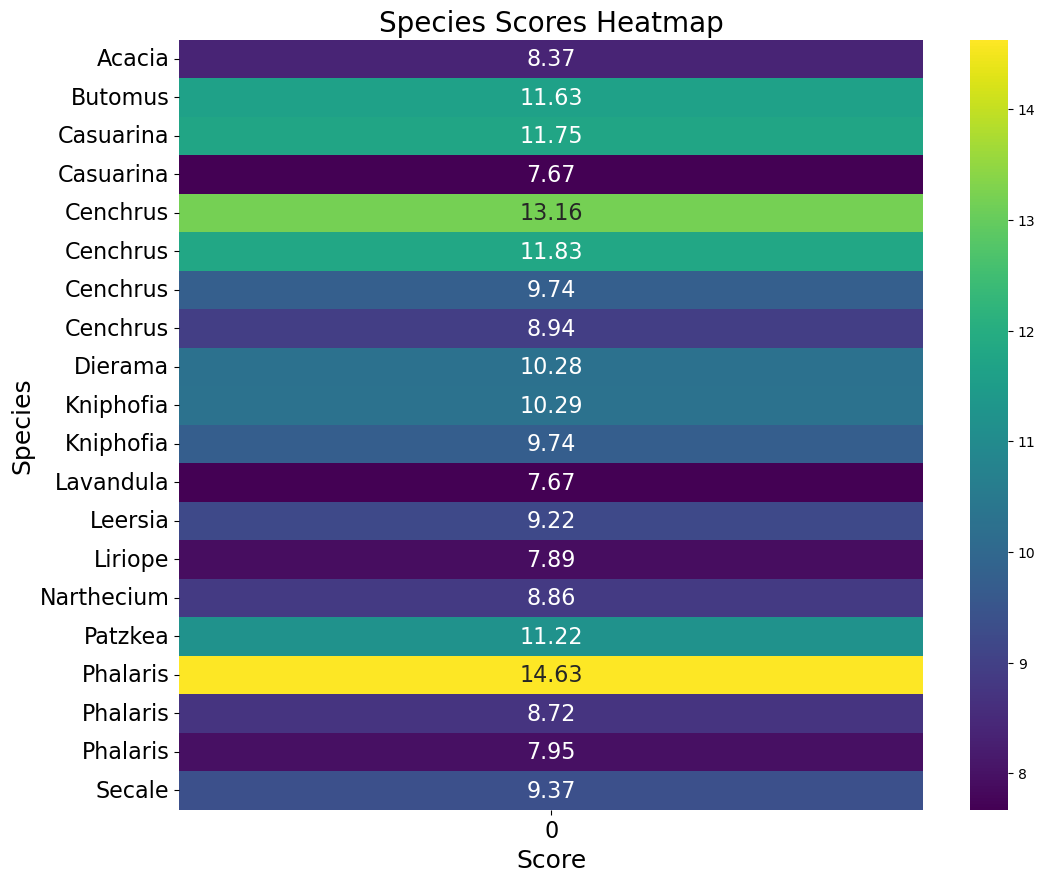

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming sorted_scores and sorted_species are already defined
# Create a heatmap-friendly 2D array from the sorted species and scores
heatmap_data = np.array(sorted_scores).reshape(-1, 1)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".2f", yticklabels=sorted_species, annot_kws={"size": 16})

plt.title('Species Scores Heatmap', fontsize=20)
plt.xlabel('Score', fontsize=18)
plt.ylabel('Species', fontsize=18)

# Increase the size of the tick labels
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.savefig('heatmap.png')
plt.show()
